<div style="background-color: RGB(0,90,60);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Análise dos Ingressantes UFABC</h2>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(255, 211, 0);" >
<h3 style="margin: auto; padding: 10px; color: RGB(0,0,0); ">Análises Feitas:</h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
        <lu>
            <li> <a href="#analise1">Cota para pessoas transgênero está mais concorrida</a> </li>
            <li> <a href="#analise2">Mais pessoas entraram em 2023 do que em outros anos</a> </li>
        </lu>
    </div>
</div>
<div style="border: 1px solid RGB(255, 211, 0);" >
<h6 style="margin: auto; padding: 3px; color: RGB(0,0,0); ">&nbsp;&nbsp;Leonardo Dias Trindade da Silva </h6>
</div>

In [1]:
# Pacotes para manipulação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pacotes nativos do python
from glob import glob
import re

In [359]:
# Definindo fonte das informações
SOURCE = r'./bd_prograd01'
FILES = glob(SOURCE+'/bd_prograd01_*.csv')

In [87]:
# Extração, formatação e limpeza da base
df = pd.concat([pd.read_csv(_file, sep=';', encoding='latin', dtype='str').\
                assign(ano_arquivo = re.search('bd_prograd01_(\d{4}).csv', _file)[1])
                for _file in FILES], ignore_index=True)

df.nota = df.nota.str.replace(',', '.').astype('float64')
df['opção de campus'] = df['opção de campus'].str.upper()
dic = {'Ciência e Tecnologia': 'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
       'Ciências Naturais e Exatas': 'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
       'Ciências e Humanidades': 'BACHARELADO EM CIÊNCIAS E HUMANIDADES',
       'Ciências Humanas': 'BACHARELADO EM CIÊNCIAS E HUMANIDADES'}
df['opção de curso'] = df['opção de curso'].str.rstrip().replace(dic)

<a id='analise1'></a>
# 1. Cota para pessoas transgênero está mais concorrida

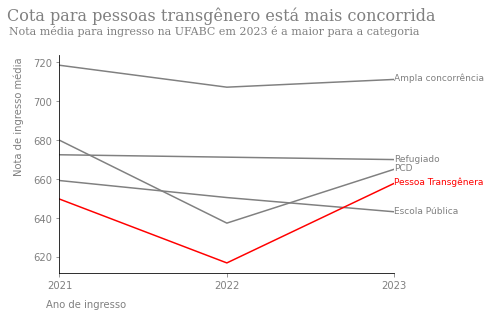

In [355]:
df1 = df.query('ano_arquivo > "2020" and `status de matrícula` == "Matriculado(a)"')\
      .assign(modalidade = df['modalidade convocação'].str.extract('\S* - (?P<c>[^\+]*)').c.str.rstrip())\
      .groupby(['ano_arquivo', 'modalidade'])[['nota']].mean().reset_index()

fig, ax = plt.subplots(facecolor='white')
ax.spines[['right', 'top']].set_visible(False)

last_year = df1.ano_arquivo.max()

for tipo_concorrencia in df1.modalidade.unique():
  c1 = 'red' if tipo_concorrencia == 'Pessoa Transgênera' else 'gray'
  ax.plot('ano_arquivo', 'nota', label=tipo_concorrencia, c=c1,
          data=df1.query('modalidade == @tipo_concorrencia'))
  ax.text(last_year,
          df1.query('ano_arquivo == @last_year and modalidade == @tipo_concorrencia').nota - 0.6,
          tipo_concorrencia, size=9, c=c1)

ax.set(xlabel = 'Ano Ingresso', ylabel='Nota Média', xlim = ("2021", last_year))

font1 = {'family':'serif','color':'gray'}
fig.suptitle('Cota para pessoas transgênero está mais concorrida',
             fontdict = font1, x=0.5, y=1.05, size=16)
ax.set_title('''Nota média para ingresso na UFABC em 2023 é a maior para a categoria''',
             fontdict = font1, loc='left', x=-0.15, y=1.07, size=11)

ax.yaxis.label.set_color('gray')
ax.xaxis.label.set_color('gray')
ax.tick_params(colors='gray')
ax.set_ylabel('Nota de ingresso média', ha='left', y=0.45, rotation=90, labelpad=9)
ax.set_xlabel('Ano de ingresso', ha='left', x=-0.04, rotation=0, labelpad=9)

plt.show();

<a id='analise2'></a>
# Mais pessoas entraram em 2023 do que em outros anos

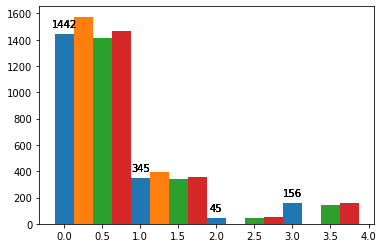

In [356]:
df2 = df.query('`status de matrícula` == "Matriculado(a)"')\
        .groupby(['opção de curso', 'ano_arquivo'])[['inscrição no ENEM']]\
        .count().reset_index()

df2 = pd.merge(pd.DataFrame({'ano_arquivo': df2.ano_arquivo.unique()}),
               pd.DataFrame({'opção de curso': df2['opção de curso'].unique()}), 
               how='cross')\
        .merge(df2, on=['ano_arquivo', 'opção de curso'], how='left').fillna(0)\
        .astype({'inscrição no ENEM': 'int'})

fig, ax = plt.subplots(facecolor='white')

x = np.arange(len(df2['opção de curso'].unique()))  # the label locations
width = 0.25  # the width of the bars

cursos = df2['opção de curso'].unique()
x = np.arange(len(cursos))
for i, ano in enumerate(df2['ano_arquivo'].unique()):
    ax.bar(x + 0.25*i, 
           df2.query('ano_arquivo == @ano')['inscrição no ENEM'].to_list(),
           width, label=ano)
    ax.bar_label(rects, padding=5)

plt.show()

<div style="border: 1px solid RGB(0,90,60);" >
<h4 style="margin: auto; padding: 3px; color: RGB(0,90,60); ">&nbsp;&nbsp;Base de dados&nbsp;&nbsp;<a href="https://dados.ufabc.edu.br/bases-dados/44-bd-prograd01">Classificação Geral do Ingresso - bd_prograd01</a></h4>
</div>